In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [93]:
iris, _ = datasets.load_iris(return_X_y=True, as_frame=True)
iris.rename(columns={"sepal length (cm)" : "sepal_length", "sepal width (cm)": "sepal_width",
                     "petal length (cm)": "petal_length", "petal width (cm)": "petal_width"}, inplace=True)
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width
58,6.6,2.9,4.6,1.3
84,5.4,3.0,4.5,1.5
114,5.8,2.8,5.1,2.4
99,5.7,2.8,4.1,1.3
60,5.0,2.0,3.5,1.0
107,7.3,2.9,6.3,1.8
30,4.8,3.1,1.6,0.2
143,6.8,3.2,5.9,2.3
110,6.5,3.2,5.1,2.0
10,5.4,3.7,1.5,0.2


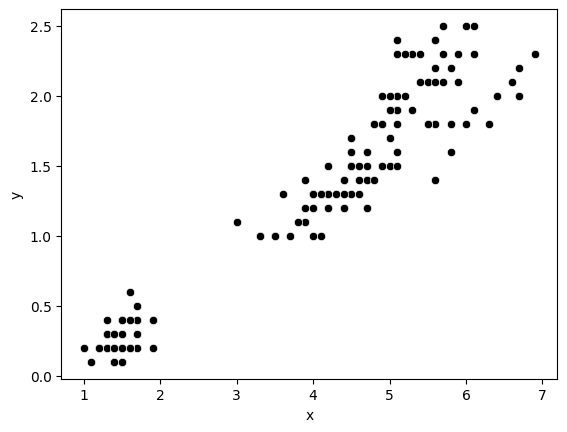

In [94]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width", color="black")
plt.xlabel('x')
plt.ylabel('y');

In [95]:
class Center():
  def __init__(self, data):
    num_dimensions = data.shape[1]
    self.coordinates = np.array([0.0] * num_dimensions)
    for i in range(num_dimensions):
      min_value = np.min(data[:,i])
      max_value = np.max(data[:,i])
      random_value = random.uniform(min_value, max_value)
      self.coordinates[i] = random_value

  def __str__(self):
    return str(self.coordinates)

  def __repr__(self):
    return str(self.coordinates)

  def dist(self, data_point):
    return np.sqrt(np.sum((self.coordinates - data_point)**2, axis = 1))

  def dist_sq(self, data_point):
    return np.sum((self.coordinates - data_point)**2, axis=1)

In [96]:
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)

In [97]:
c1.coordinates = np.array([2.52364007, 2.31040024])
c2.coordinates = np.array([6.53276402, 1.211463])

In [98]:
def plot_centers_and_black_data(iris, centers):
  for center in centers:
    plt.plot(center.coordinates[0], center.coordinates[1], '*', markersize=10)
  sns.scatterplot(data=iris, x="petal_length", y="petal_width", color="black")
  plt.xlabel('petal_length')
  plt.ylabel('petal_width')
  legend_text = ['c' + str(i) for i in range(1, len(centers) + 1)]
  legend_text.append('data')
  plt.legend(legend_text)

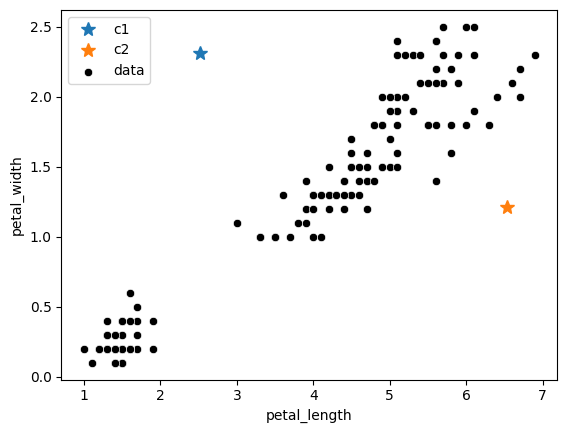

In [99]:
plot_centers_and_black_data(iris,(c1,c2))

In [100]:
def get_cluster_number(dists):
  return np.where(dists == np.min(dists))[0][0]

In [101]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1","dist2"]].apply(get_cluster_number, axis=1)
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,dist1,dist2,cluster
0,5.1,3.5,1.4,0.2,2.390890,5.231474,0
1,4.9,3.0,1.4,0.2,2.390890,5.231474,0
2,4.7,3.2,1.3,0.2,2.439484,5.329623,0
3,4.6,3.1,1.5,0.2,2.345555,5.133398,0
4,5.0,3.6,1.4,0.2,2.390890,5.231474,0


In [102]:
iris["cluster"].value_counts()

,count
cluster,
0,79
1,71


In [103]:
def plot_centers_and_colorized_data(iris, centers):
  plt.figure()
  for center in centers:
    plt.plot(center.coordinates[0], center.coordinates[1],
             marker='*', markersize=10, linestyle="None")
    current_palette = sns.color_palette()[0:len(centers)]
    sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="cluster", palette=current_palette)
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    legend_text = ['c' + str(i) for i in range(1, len(centers) + 1)]
    legend_text.append('data')
    plt.legend(legend_text)

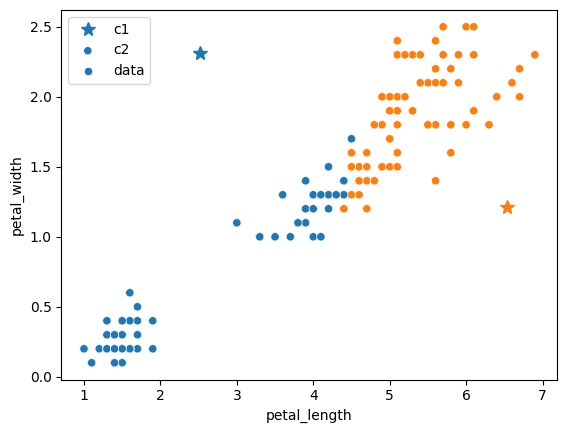

In [104]:
plot_centers_and_colorized_data(iris, (c1,c2))

In [105]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

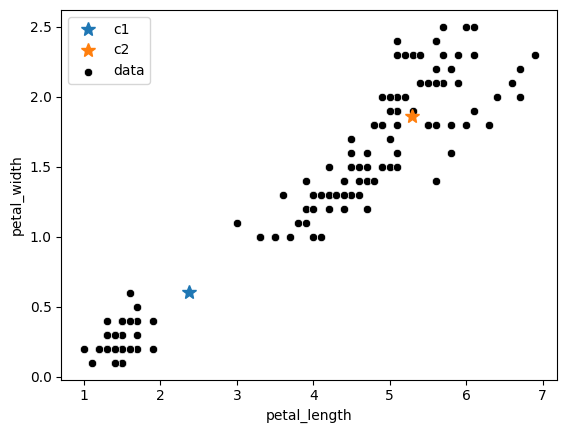

In [106]:
plot_centers_and_black_data(iris,(c1,c2))

In [107]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis=1)

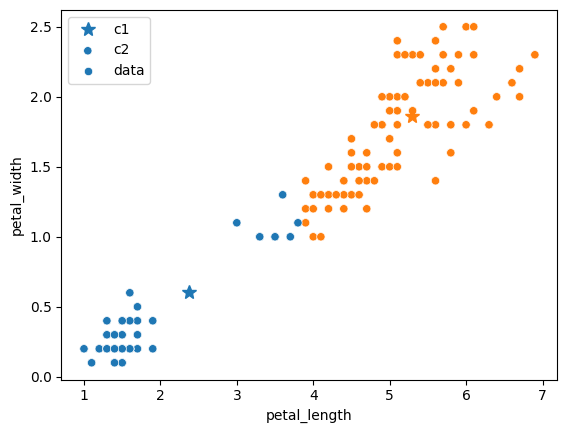

In [108]:
plot_centers_and_colorized_data(iris,(c1, c2))

In [109]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

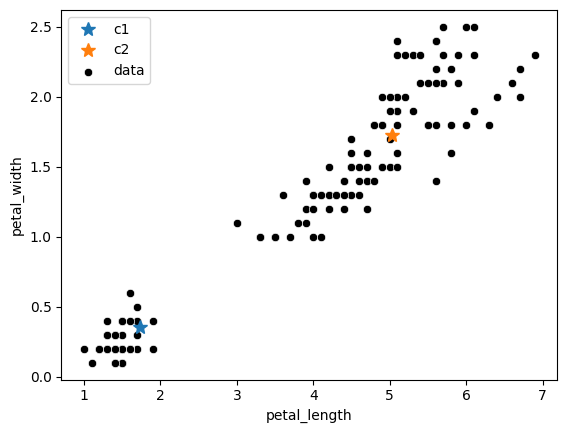

In [110]:
plot_centers_and_black_data(iris,(c1,c2))

In [111]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis=1)

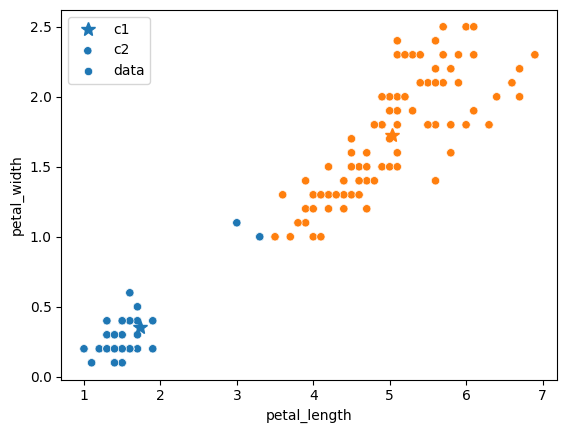

In [112]:
plot_centers_and_colorized_data(iris,(c1, c2))

In [113]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

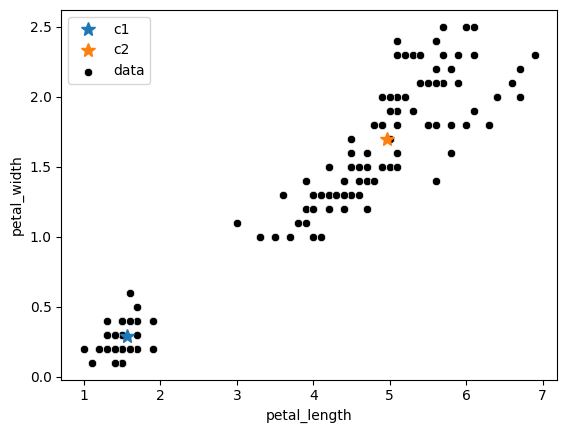

In [114]:
plot_centers_and_black_data(iris,(c1,c2))

In [115]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis=1)

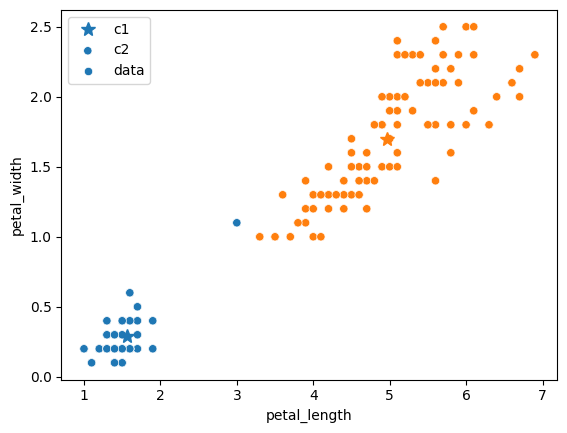

In [116]:
plot_centers_and_colorized_data(iris,(c1, c2))

In [117]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

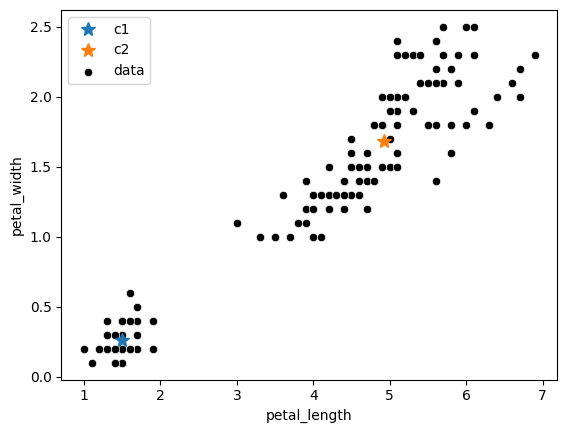

In [118]:
plot_centers_and_black_data(iris,(c1,c2))

In [119]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis=1)

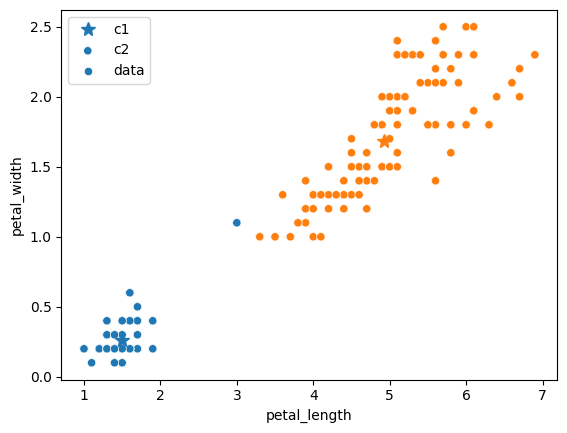

In [120]:
plot_centers_and_colorized_data(iris,(c1, c2))

In [121]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

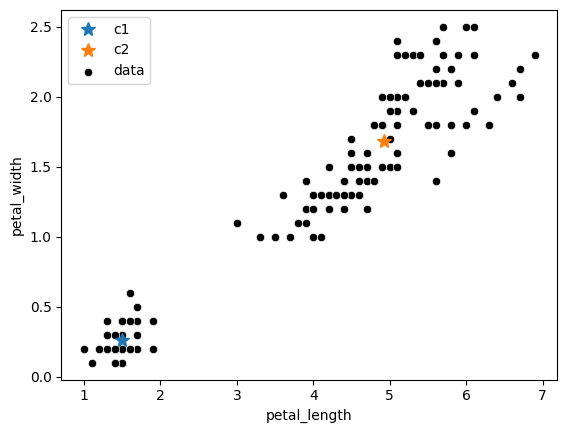

In [122]:
plot_centers_and_black_data(iris,(c1,c2))

In [123]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

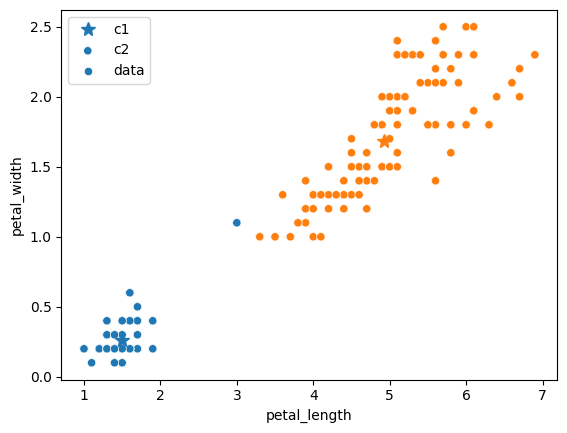

In [124]:
plot_centers_and_colorized_data(iris,(c1, c2))

In [125]:
import copy
def compute_centers_after_N_iterations(data, column_names, centers, N):
  centers = copy.deepcopy(centers)

  for i in range(N):
    dist_names = []
    for center_num in range(len(centers)):
      data["dist" + str(center_num)] = centers[center_num].dist(data[column_names])
      dist_names.append("dist" + str(center_num))

    data["cluster"] = data[dist_names].apply(get_cluster_number, axis = 1)

    for center_num in range(len(centers)):
      for col_num in range(len(column_names)):
        col_name = column_names[col_num]

        centers[center_num].coordinates[col_num] = np.mean(data[data["cluster"] == center_num][col_name])

  return centers

In [126]:
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c1.coordinates = np.array([2.52364007, 2.31040024])
c2.coordinates = np.array([6.53276402, 1.211463])

In [127]:
def inertia(data, centers):
  total_inertia = 0
  for center_num in range(len(centers)):
    data_in_this_cluster = data[data["cluster"] == center_num]
    total_inertia += np.sum(centers[center_num].dist(data_in_this_cluster[["petal_length","petal_width"]]))
  return total_inertia

In [128]:
def distortion(data, centers):
  total_distortion = 0
  for center_num in range (len(centers)):
    data_in_this_cluster = data[data["cluster"] == center_num]
    total_distortion += np.sum(centers[center_num].dist(data_in_this_cluster[["petal_length", "petal_width"]]))/len(data_in_this_cluster)
  return total_distortion

inertia: 44.88363871576328, distortion: 1.2530251953116613)


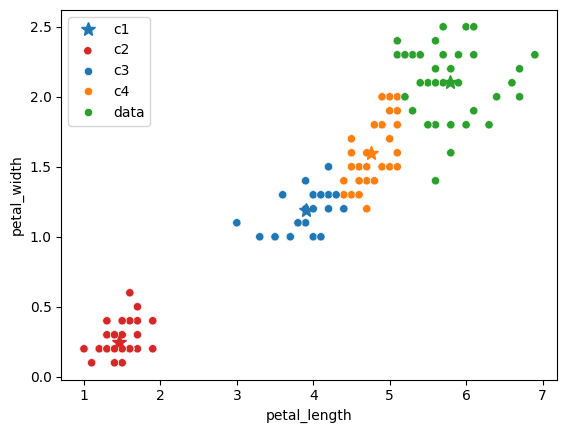

In [129]:
random.seed(25)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'],[c1,c2,c3,c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris,new_centers)})")
plot_centers_and_colorized_data(iris,new_centers)

inertia: 45.87509130916156, distortion: 1.3068391699161572)


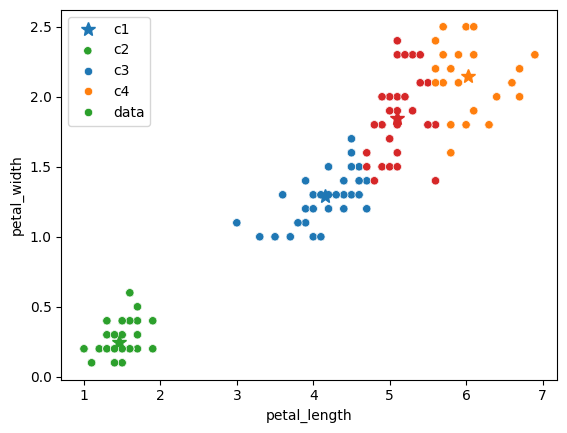

In [130]:
random.seed(29)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'],[c1,c2,c3,c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris,new_centers)})")
plot_centers_and_colorized_data(iris,new_centers)

inertia: 54.272527867765156, distortion: 1.4992328098338596)


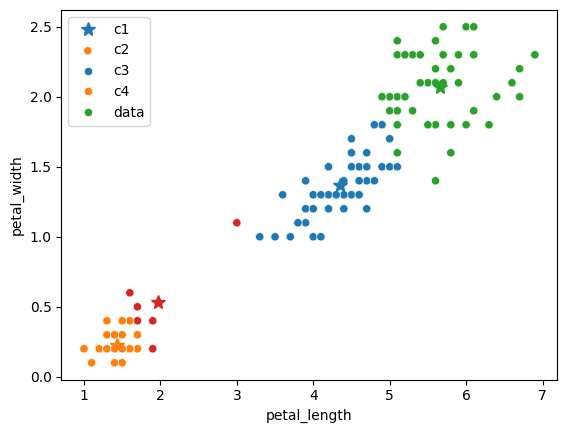

In [131]:
random.seed(40)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'],[c1,c2,c3,c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris,new_centers)})")
plot_centers_and_colorized_data(iris,new_centers)

inertia: 44.88363871576328, distortion: 1.2530251953116613)


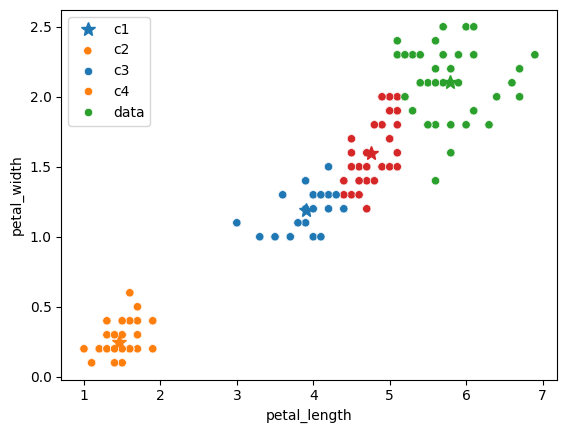

In [132]:
random.seed(75)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'],[c1,c2,c3,c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris,new_centers)})")
plot_centers_and_colorized_data(iris,new_centers)

In [133]:
c1.coordinates = [1.2, 0.15]
c2.coordinates = [4.906000000000001, 1.6760000000000006]
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

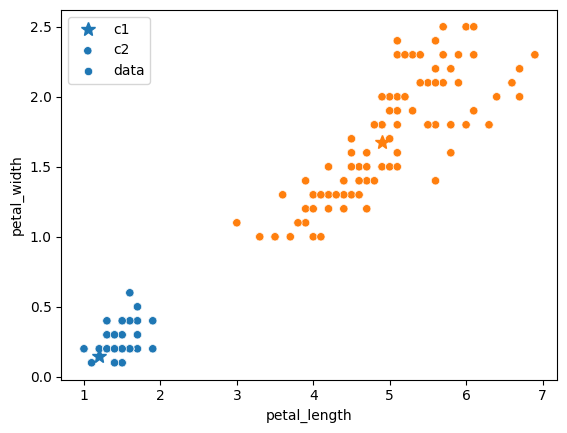

In [134]:
plot_centers_and_colorized_data(iris,(c1,c2))

In [135]:
print(f"inertia: {inertia(iris, [c1, c2])}, distortion: {distortion(iris, [c1, c2])})")

inertia: 94.3164648130483, distortion: 1.0959547804008838)


In [136]:
average_c1_length = np.mean(iris[iris["cluster"] == 0]["petal_length"])
average_c1_width = np.mean(iris[iris["cluster"] == 0]["petal_width"])
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1]["petal_length"])
average_c2_width = np.mean(iris[iris["cluster"] == 1]["petal_width"])
c2.coordinates = (average_c2_length, average_c2_width)

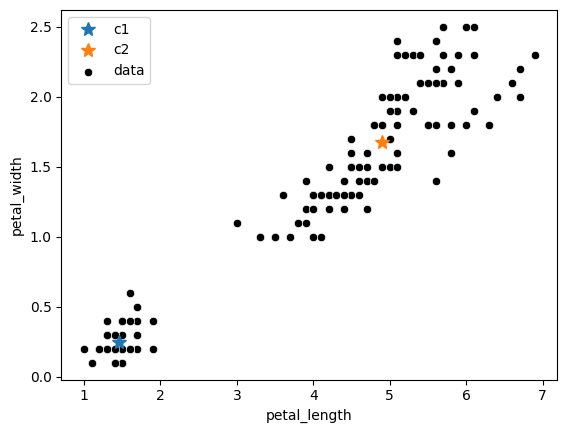

In [137]:
plot_centers_and_black_data(iris, (c1,c2))

In [138]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis=1)

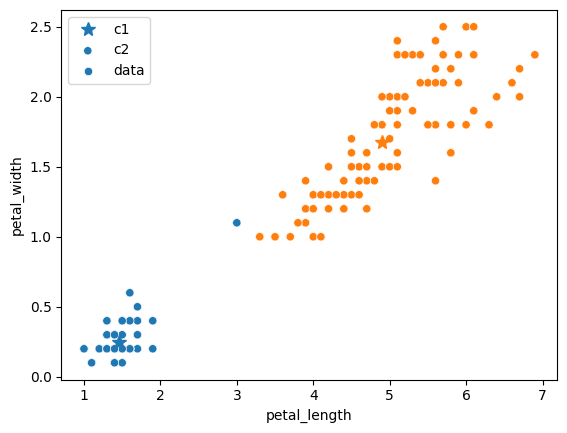

In [139]:
plot_centers_and_colorized_data(iris, (c1,c2))

In [140]:
print(f"inertia: {inertia(iris, [c1,c2])}, distortion: {distortion(iris, [c1, c2])})")

inertia: 87.2103463131798, distortion: 0.9775403068856574)


In [141]:
np.random.seed(42)
iris_small = iris.sample(13).loc[:, 'sepal_length':'petal_width'].reset_index(drop=True)
iris_small = iris_small.drop(8).reset_index(drop=True)

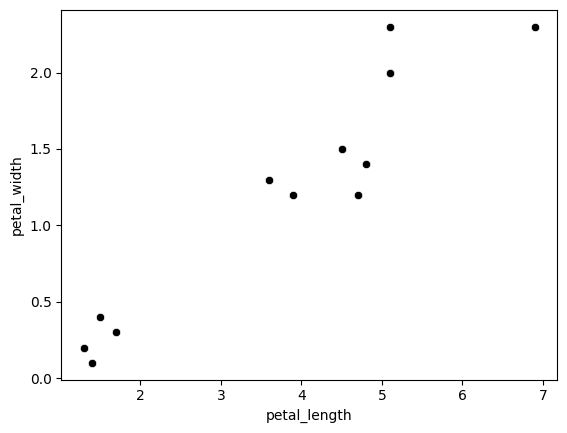

In [142]:
sns.scatterplot(data=iris_small, x="petal_length", y="petal_width", color="black");

In [143]:
iris_small["cluster"] = np.array(range(0, len(iris_small)))

In [144]:
iris_small

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,6.1,2.8,4.7,1.2,0
1,5.7,3.8,1.7,0.3,1
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,3
4,6.8,2.8,4.8,1.4,4
5,5.4,3.4,1.5,0.4,5
6,5.6,2.9,3.6,1.3,6
7,6.9,3.1,5.1,2.3,7
8,5.8,2.7,3.9,1.2,8
9,6.5,3.2,5.1,2.0,9


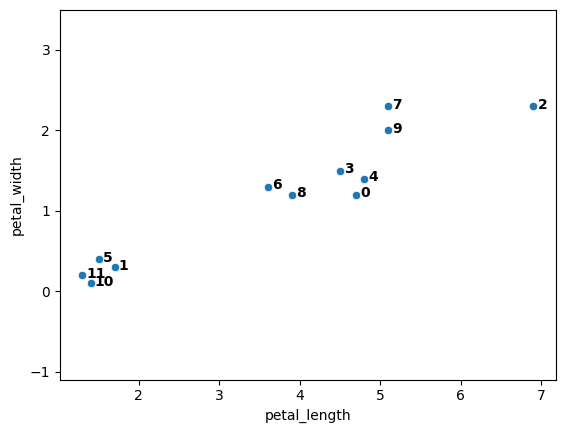

In [145]:
def plot_clusters(data):
  fig = plt.figure()
  p1 = sns.scatterplot(data=data, x="petal_length", y="petal_width")
  plt.axis('equal')
  for line in range(0, data.shape[0]):
    p1.text(data["petal_length"][line]+0.05, data["petal_width"][line] - 0.03,
            data["cluster"][line], horizontalalignment='left',
            size='medium', color='black', weight='semibold')
  return fig

fig = plot_clusters(iris_small)

In [146]:
from scipy.spatial.distance import cdist

def closest_clusters(data):
  cluster_values = data["cluster"].unique()

  closest_pairs = []
  processed_pairs = set()

  while len(closest_pairs) < 3:
    smallest_distance = float("inf")
    best_pair = None

    for i, cnum1 in enumerate(cluster_values):
      for cnum2 in cluster_values[i+1:]:
        if (cnum1, cnum2) in processed_pairs or (cnum2, cnum1) in processed_pairs:
          continue

        cluster1_points = data[data["cluster"] == cnum1][["petal_length", "petal_width"]]
        cluster2_points = data[data["cluster"] == cnum2][["petal_length", "petal_width"]]
        max_dist = cdist(cluster1_points, cluster2_points).max()

        if max_dist < smallest_distance:
          smallest_distance = max_dist
          best_pair = (cnum1, cnum2)

      if best_pair:
        closest_pairs.append((best_pair[0], best_pair[1], smallest_distance))
        processed_pairs.add(best_pair)

  return closest_pairs

In [147]:
def merge_clusters(data, cnum1, cnum2):
  data.loc[data["cluster"] == cnum2, "cluster"] = cnum1

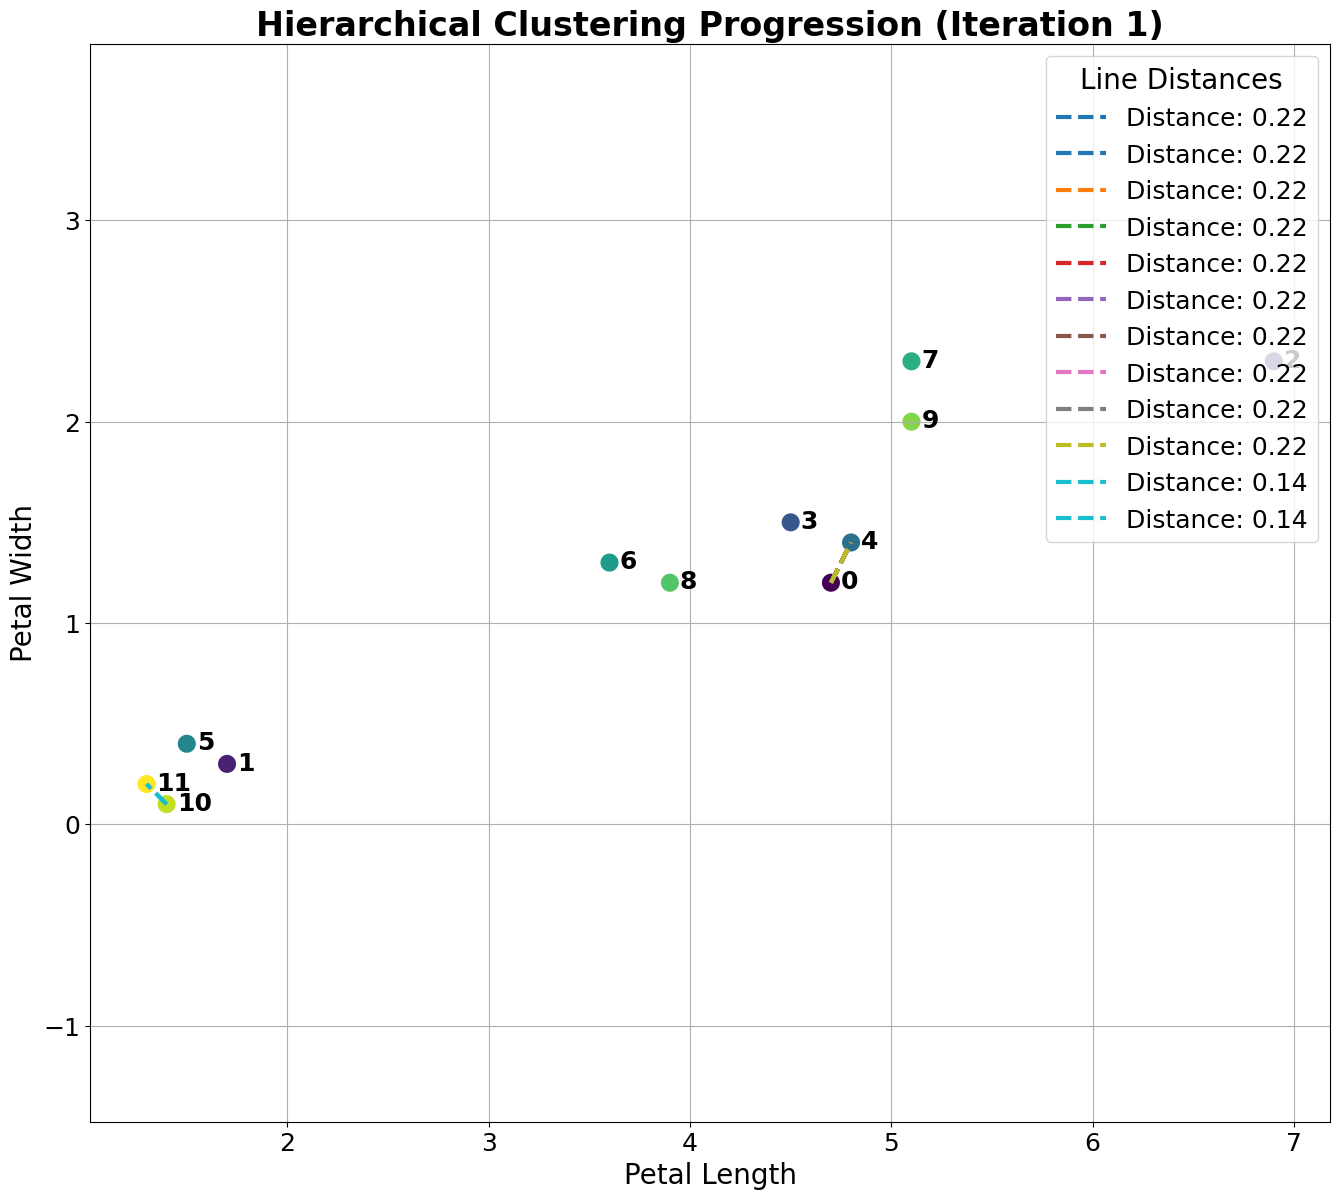

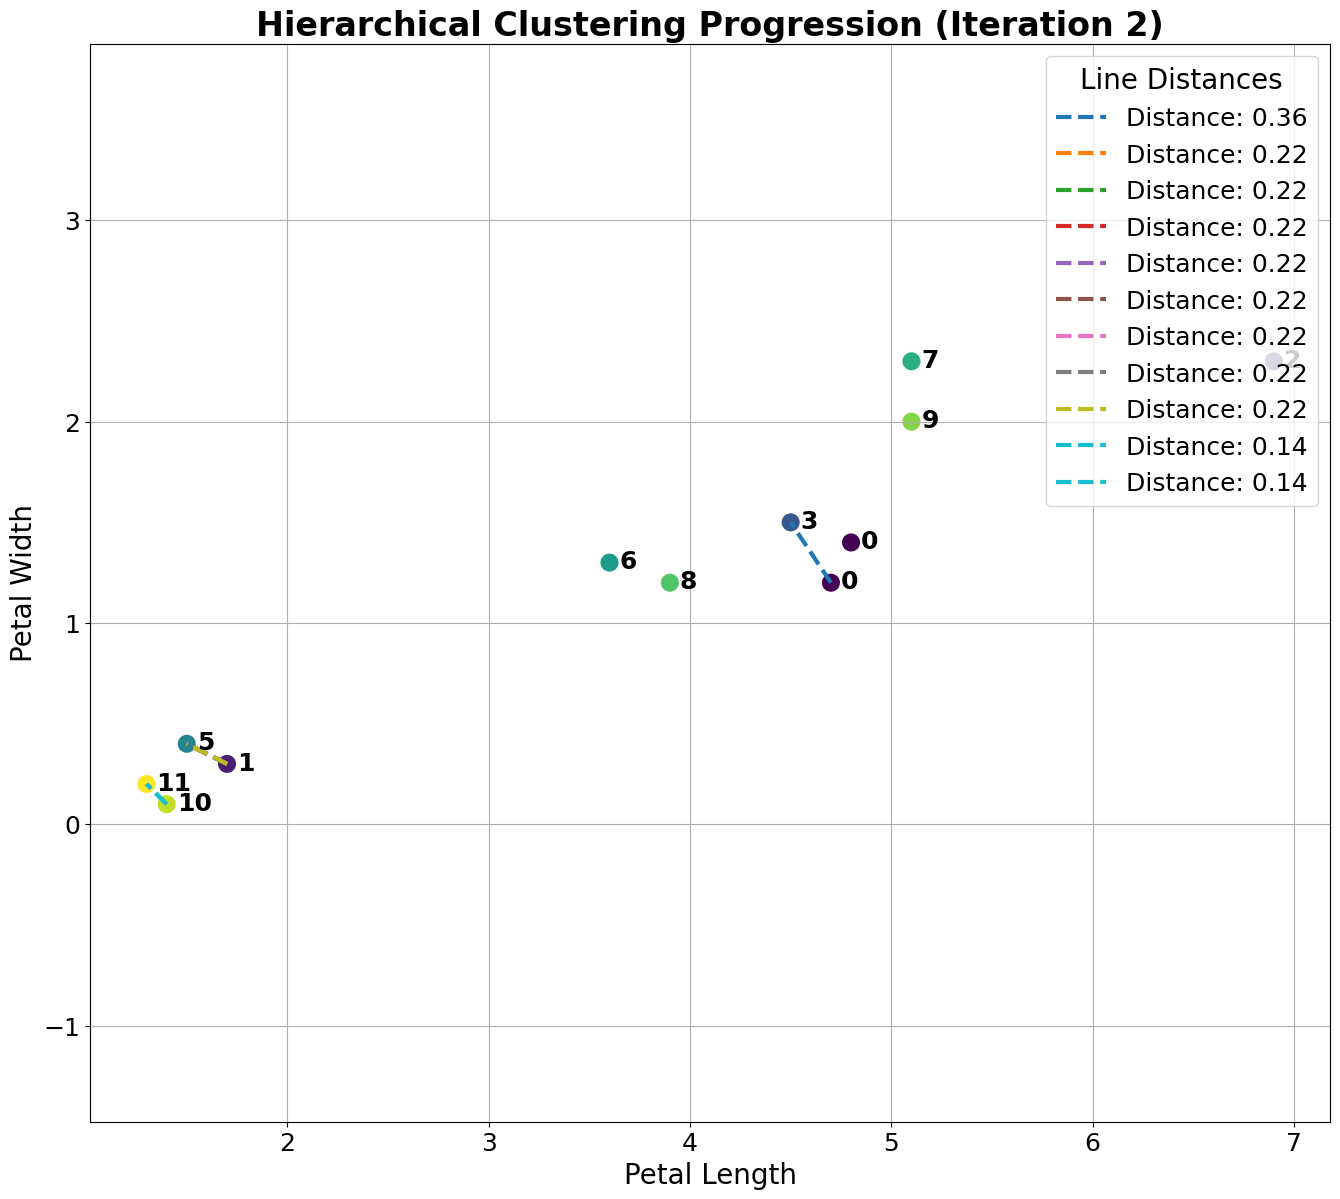

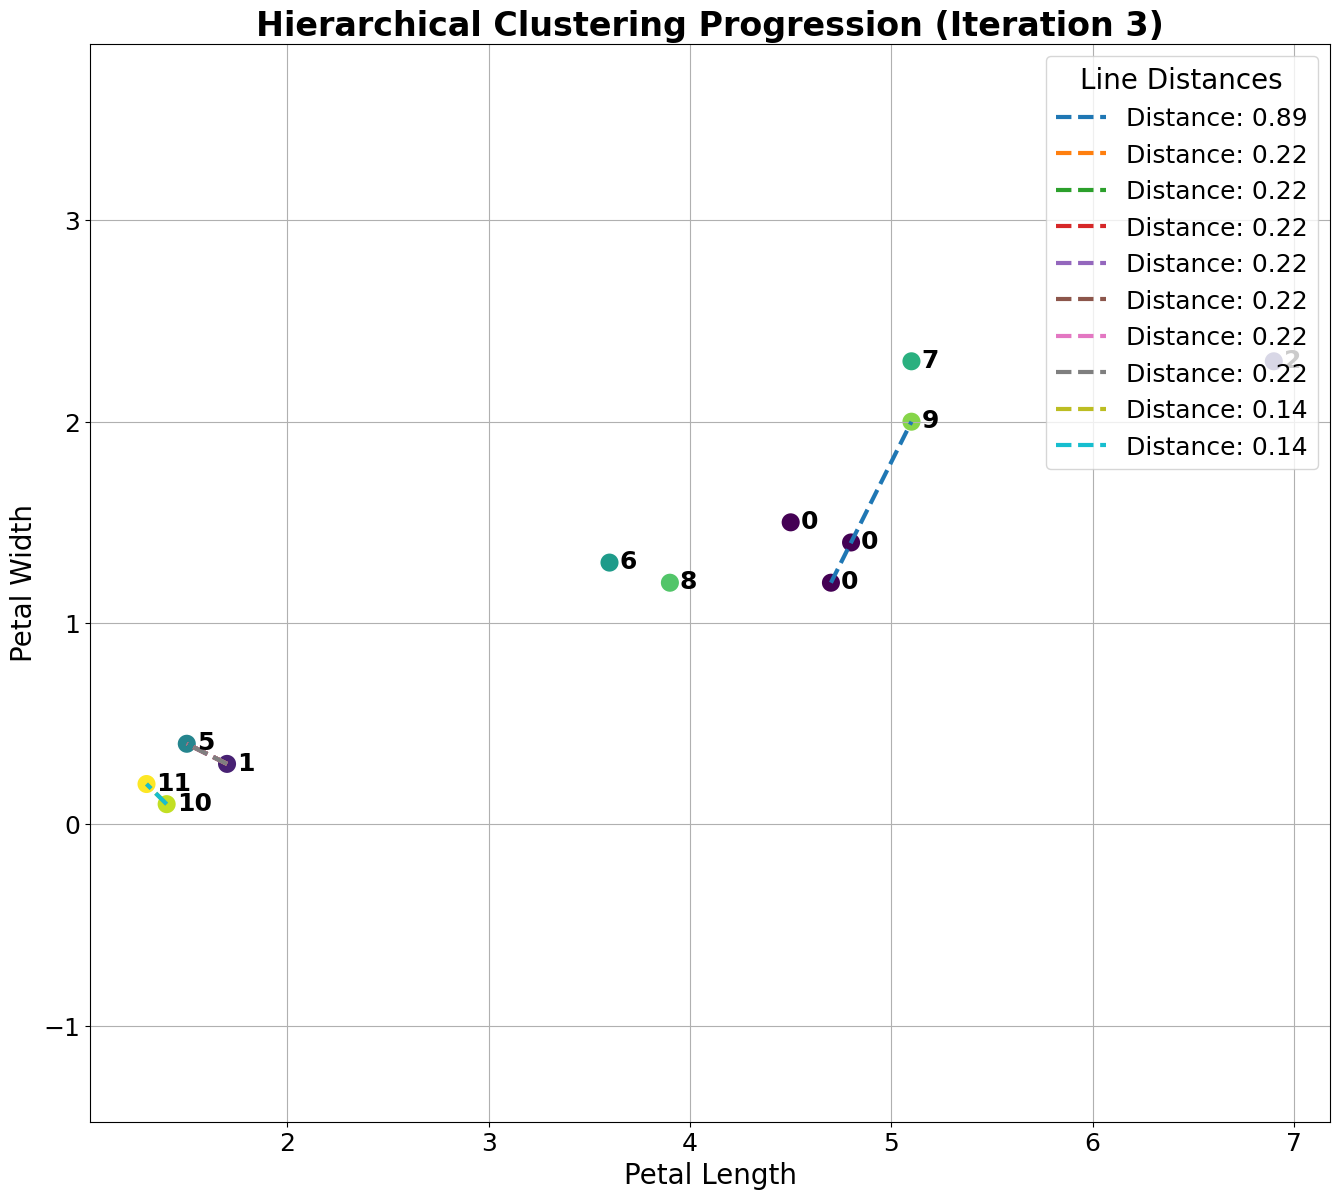

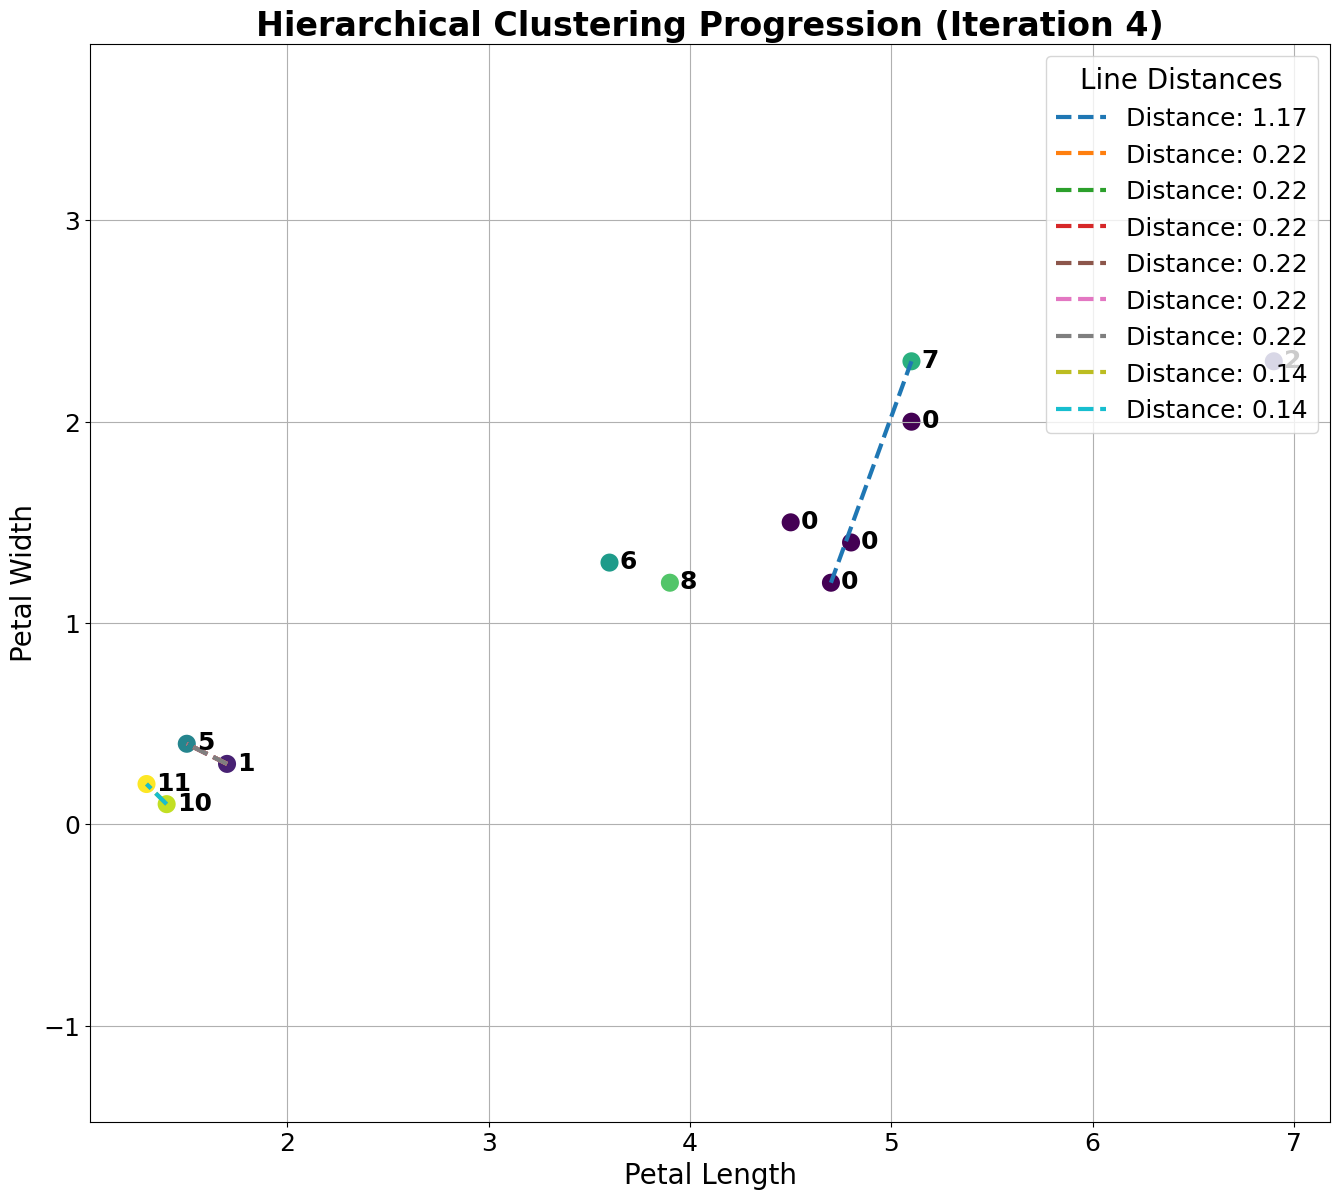

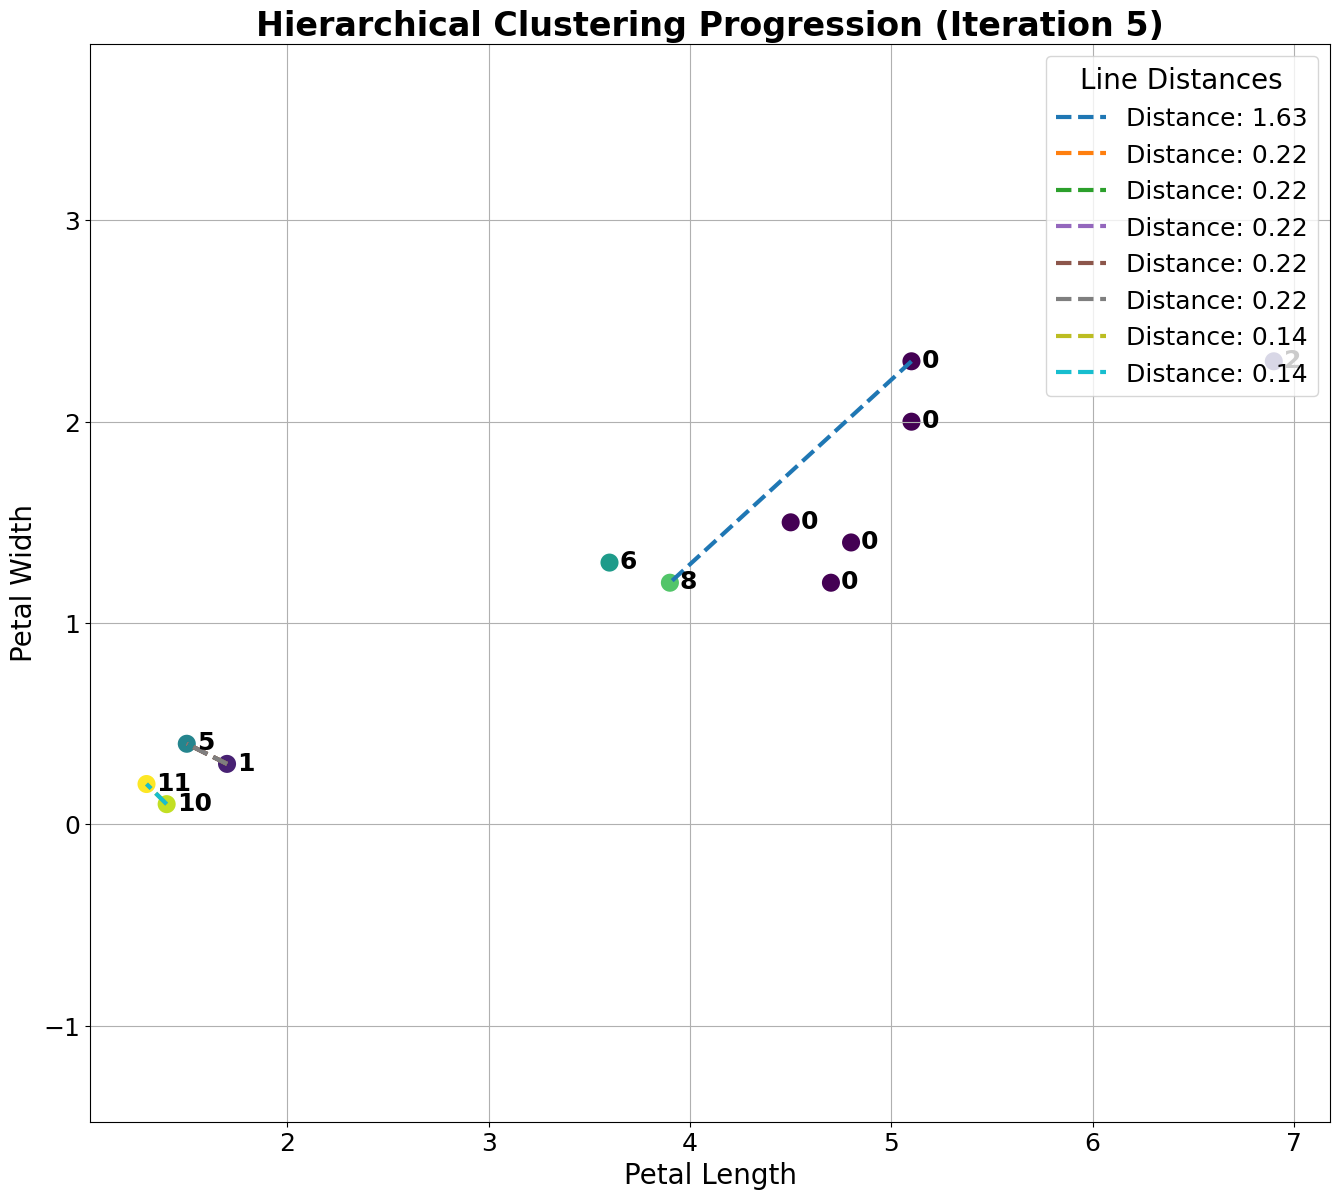

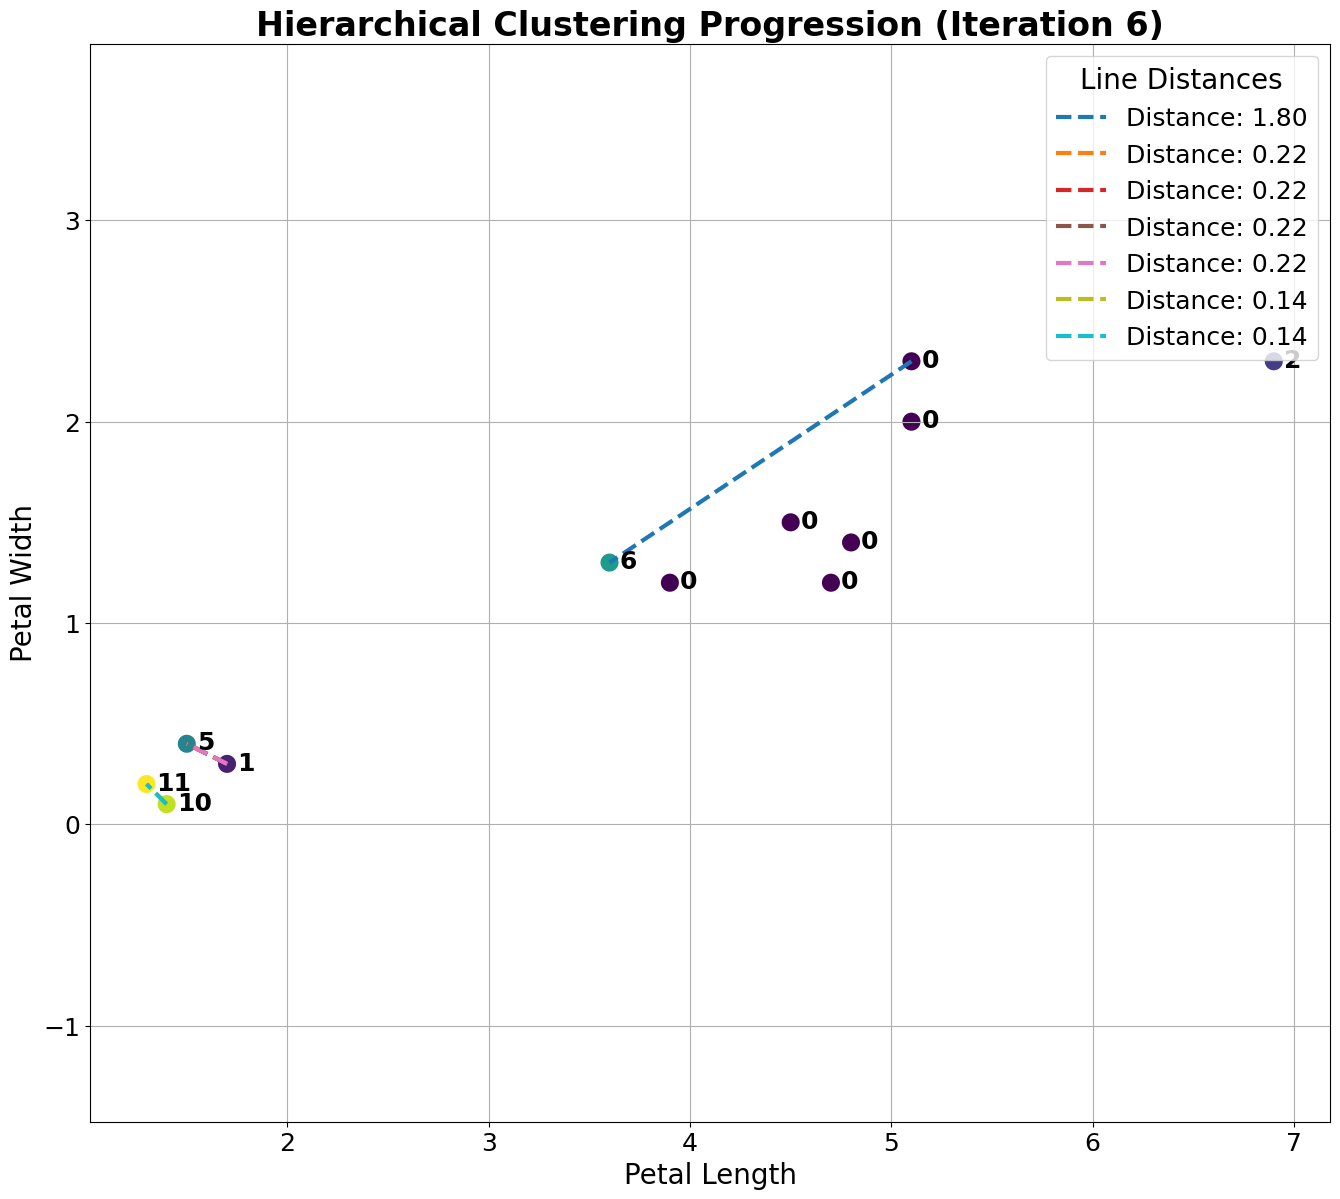

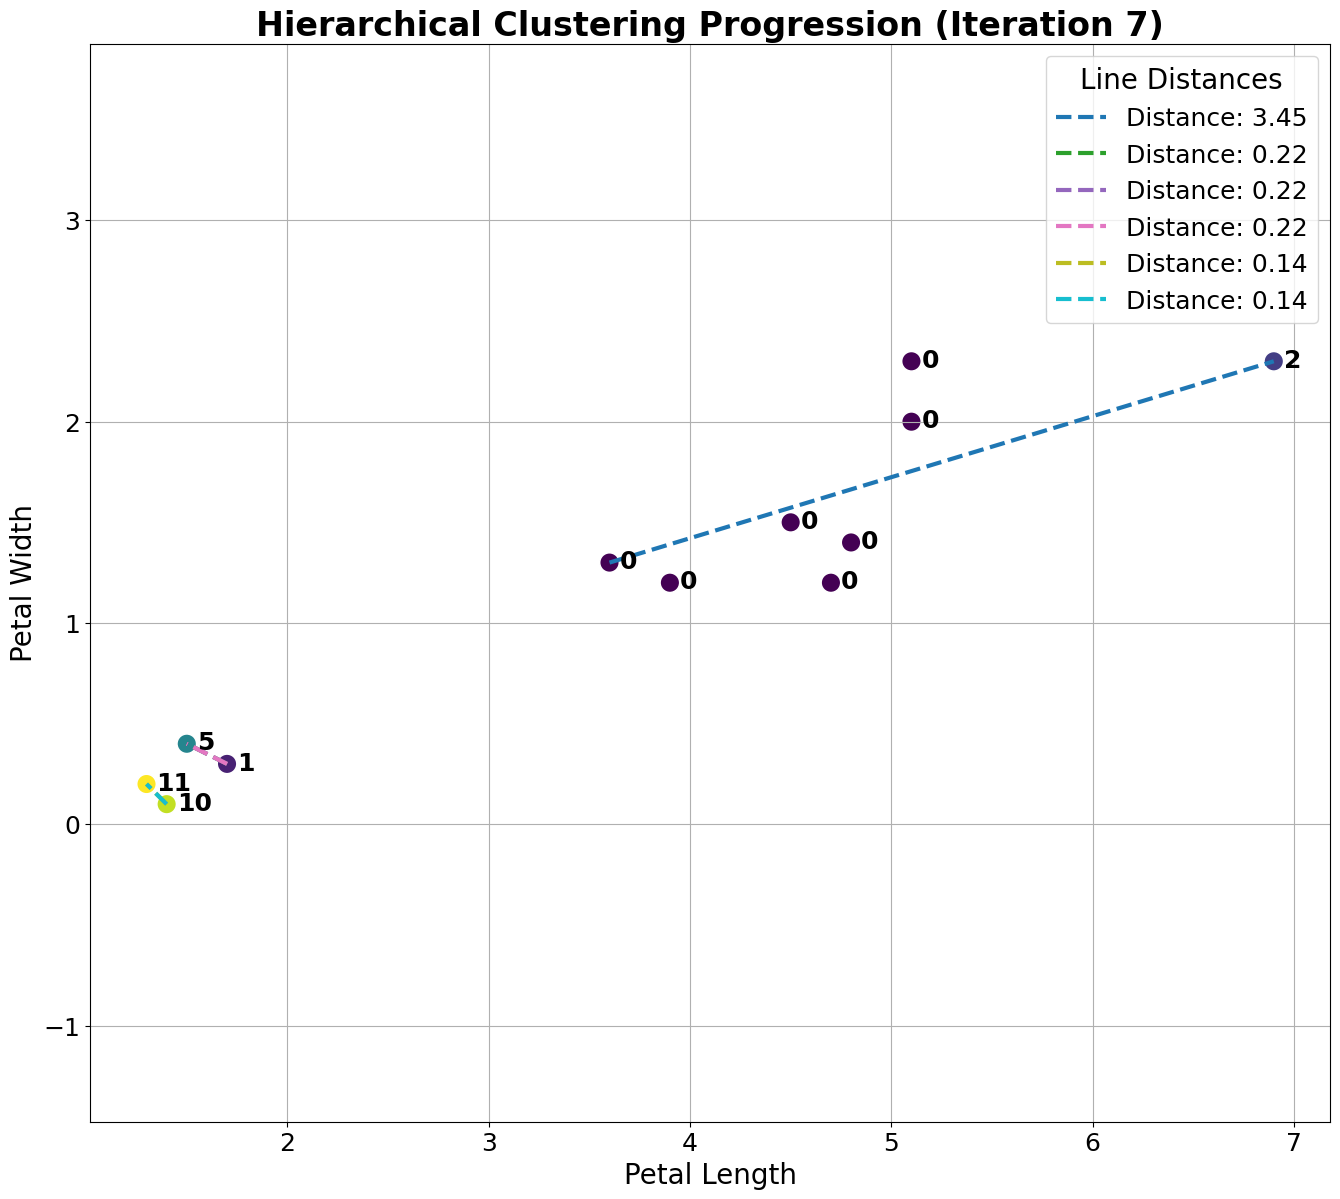

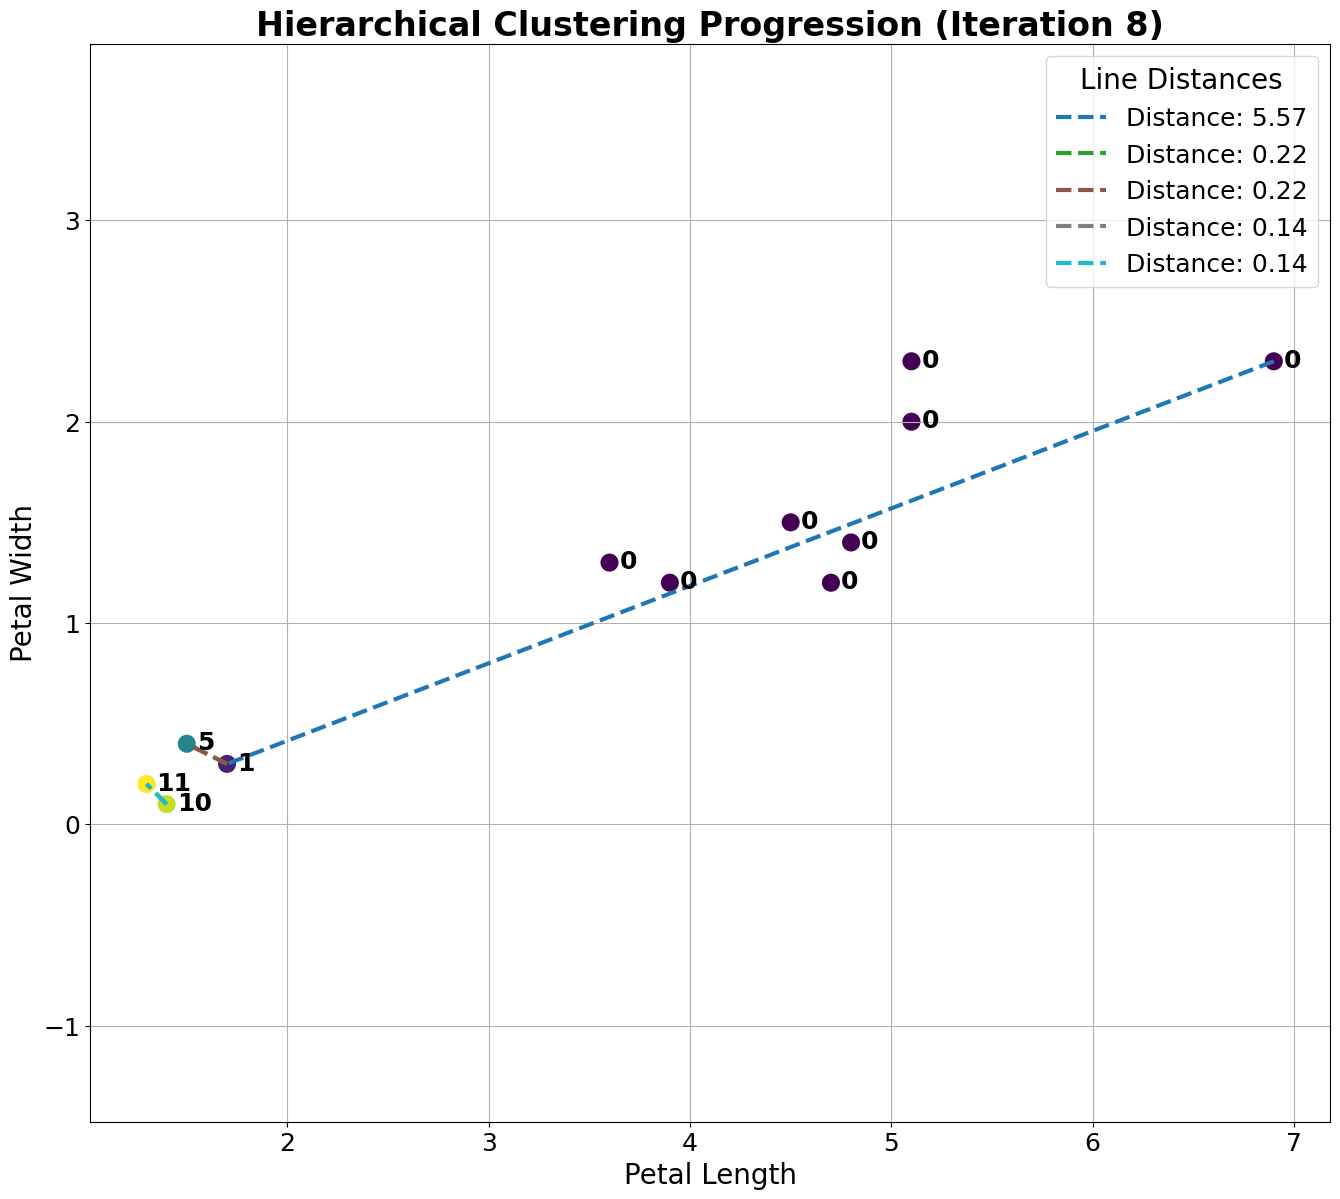

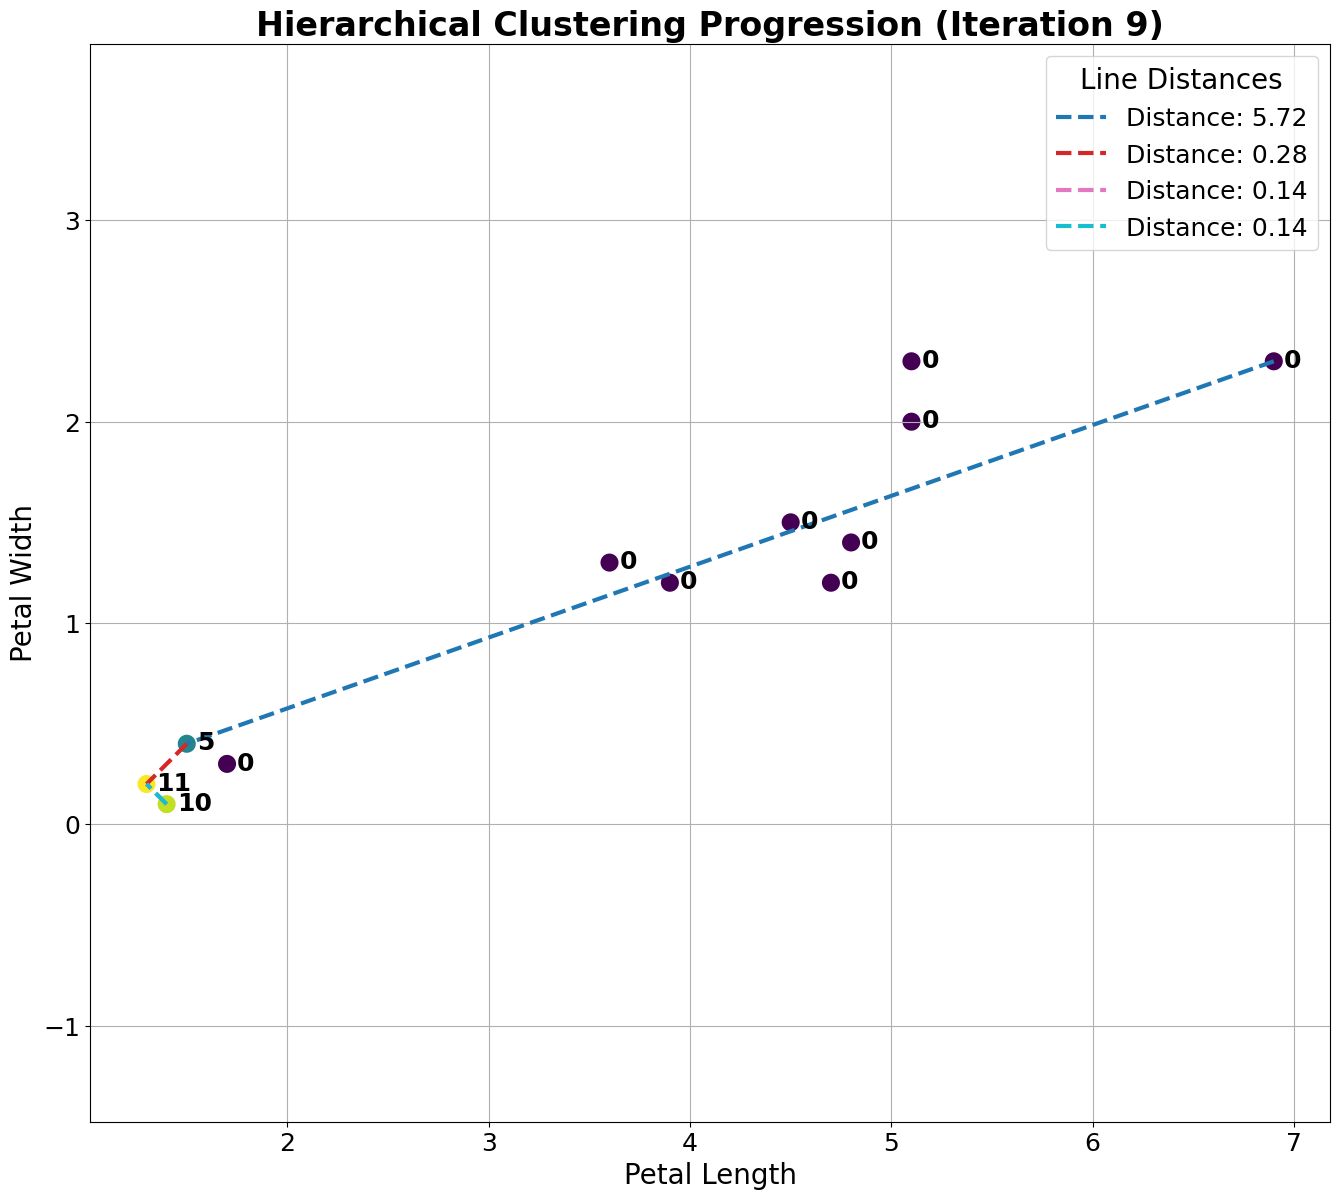

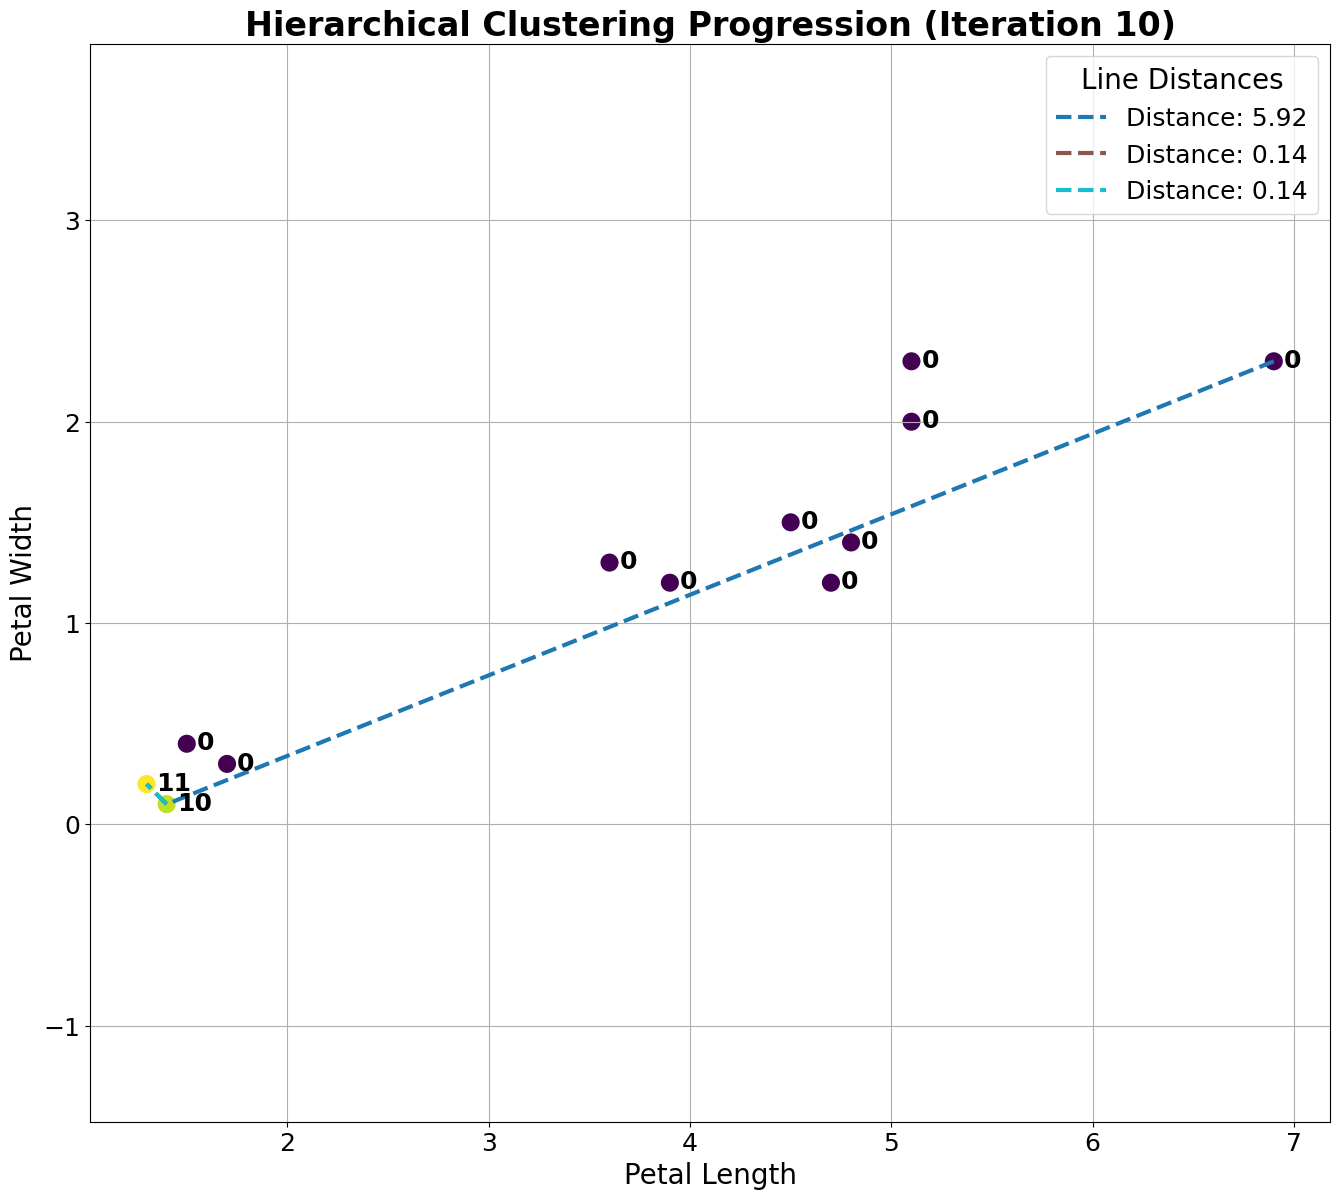

In [148]:
import matplotlib.cm as cm
from scipy.spatial import distance

def plot_clusters(iteration, data, top_pairs):
  fig = plt.figure(figsize=(16, 14))
  p1 = sns.scatterplot(
      data=data,
      x="petal_length",
      y="petal_width",
      hue="cluster",
      palette="viridis",
      legend=False,
      s=200
  )
  plt.axis('equal')

  for line in range(0, data.shape[0]):
    p1.text(
        data["petal_length"][line] + 0.05,
        data["petal_width"][line] - 0.03,
        data["cluster"][line],
        horizontalalignment = 'left',
        size=18,
        color='black',
        weight='semibold'
    )

  cmap = cm.get_cmap('tab10', len(top_pairs))
  legend_lines = []

  for i, (cnum1, cnum2, dist) in enumerate(top_pairs):
    cluster1_points = data[data["cluster"] == cnum1]
    cluster2_points = data[data["cluster"] == cnum2]

    if cluster1_points.empty or cluster2_points.empty:
      continue

    dists = distance.cdist(
        cluster1_points[["petal_length", "petal_width"]],
        cluster2_points[["petal_length", "petal_width"]]
    )
    max_dist_idx = np.unravel_index(np.argmax(dists), dists.shape)
    point1 = cluster1_points.iloc[max_dist_idx[0]]
    point2 = cluster2_points.iloc[max_dist_idx[1]]

    line_color = cmap(i)
    plt.plot(
        [point1["petal_length"], point2["petal_length"]],
        [point1["petal_width"], point2["petal_width"]],
        linestyle='--',
        color=line_color,
        linewidth=3,
        label=f"{dist:.2f}"
    )

    legend_lines.append((f"{dist:.2f}", line_color))

  legend_labels = [f"Distance: {dist}" for dist, _ in legend_lines]
  legend_colors = [color for _, color in legend_lines]
  handles = [
      plt.Line2D([0], [0], color=color, linestyle='--', lw=3)
      for color in legend_colors
  ]
  plt.legend(handles, legend_labels, title="Line Distances", loc='upper right', fontsize=18, title_fontsize=20)

  plt.title(f'Hierarchical Clustering Progression (Iteration {iteration})', fontsize=24, weight='bold')
  plt.xlabel('Petal Length', fontsize=20)
  plt.ylabel('Petal Width', fontsize=20)
  plt.grid()
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.show()
  return fig

i = 0
while len(iris_small["cluster"].unique()) != 2:
  i += 1
  top_pairs = closest_clusters(iris_small)
  plot_clusters(i, iris_small, top_pairs=top_pairs)
  cnum1, cnum2, _ = top_pairs[0]
  merge_clusters(iris_small, cnum1, cnum2)

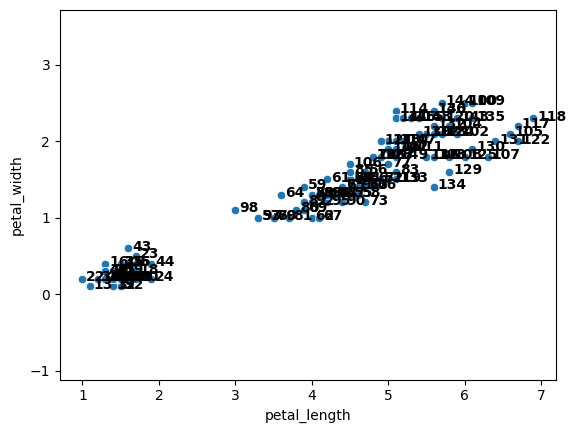

In [149]:
def plot_clusters(data):
  fig = plt.figure()
  p1 = sns.scatterplot(data=data, x="petal_length", y="petal_width")
  plt.axis('equal')
  for line in range(0, data.shape[0]):
    p1.text(data["petal_length"][line]+0.05, data["petal_width"][line] - 0.03,
            data["cluster"][line], horizontalalignment='left',
            size='medium', color='black', weight='semibold')
  return fig

iris_small = iris.copy()
iris_small["cluster"] = np.array(range(0, len(iris_small)))
fig = plot_clusters(iris_small)

In [150]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(iris[["petal_length", "petal_width"]])

In [151]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [152]:
iris["cluster"] = clustering.labels_

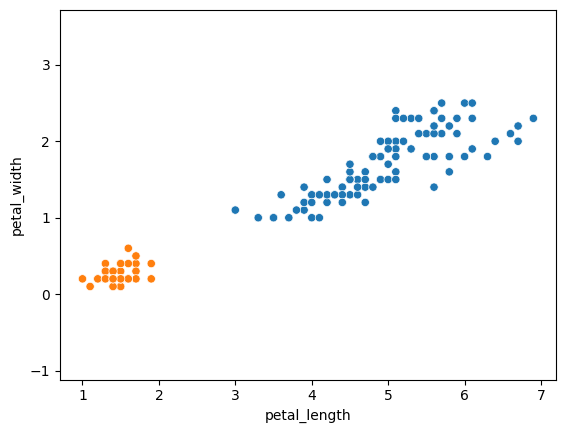

In [153]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width",
                hue="cluster", legend=None);
plt.axis('equal');

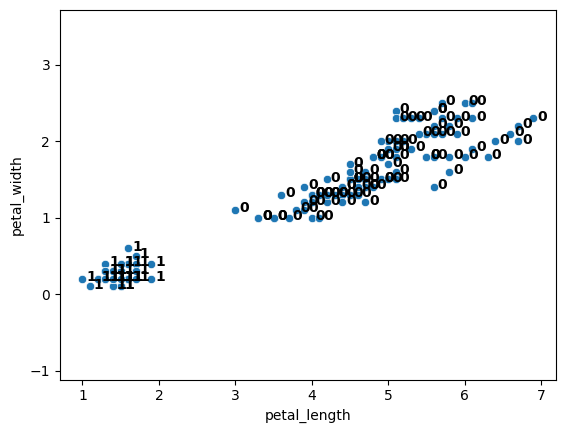

In [154]:
fig = plot_clusters(iris)

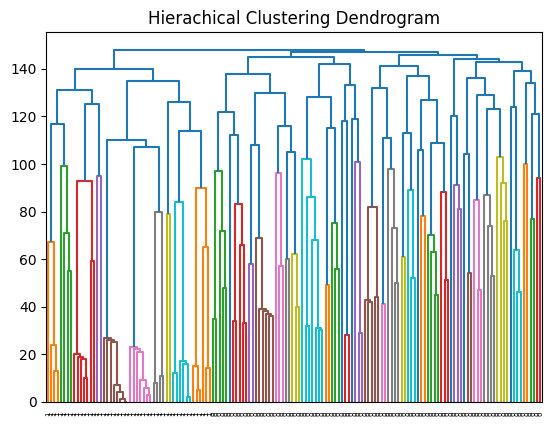

In [155]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
  children = model.children_

  distance = np.arange(children.shape[0])

  no_of_observations = np.arange(2, children.shape[0]+2)

  linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

  dendrogram(linkage_matrix, **kwargs)

plt.title('Hierachical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_)

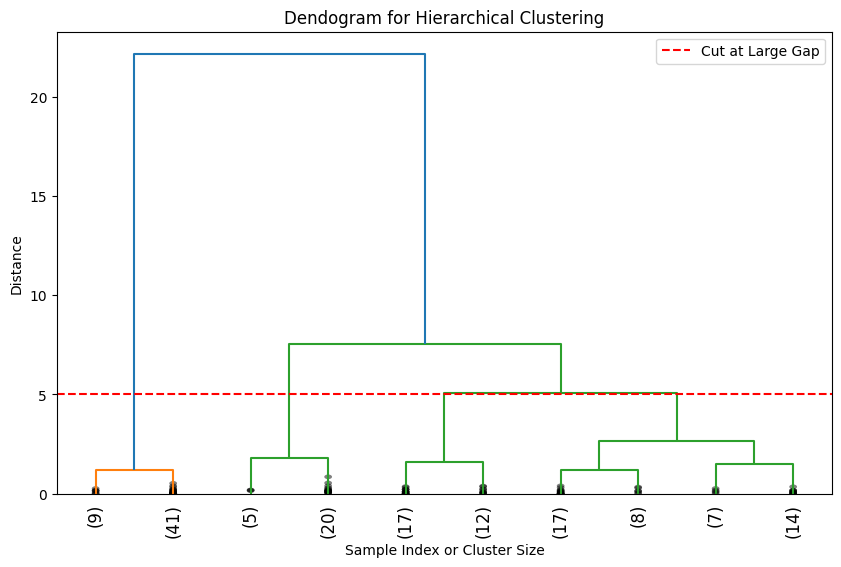

In [156]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

scaler = StandardScaler()
iris_small_scaled = scaler.fit_transform(iris[["petal_length", "petal_width"]])

linkage_matrix_small = linkage(iris_small_scaled, method='ward')

plt.figure(figsize=(10,6))
dendrogram(
    linkage_matrix_small,
    truncate_mode='lastp',
    p=10,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True
)
plt.title('Dendogram for Hierarchical Clustering')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=5, color='r', linestyle='--', label='Cut at Large Gap')
plt.legend()
plt.show()

In [157]:
from sklearn.cluster import KMeans
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,10)
X = iris[["petal_length", "petal_width"]]

for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(X)

  distortions.append(sum(np.min(distance.cdist(X, kmeanModel.cluster_centers_,
                                               'euclidean'), axis=1)) / X.shape[0])
  inertias.append(kmeanModel.inertia_)

  mapping1[k] = sum(np.min(distance.cdist(X, kmeanModel.cluster_centers_,
                                          'euclidean'), axis=1)) / X.shape[0]
  mapping2[k] = kmeanModel.inertia_

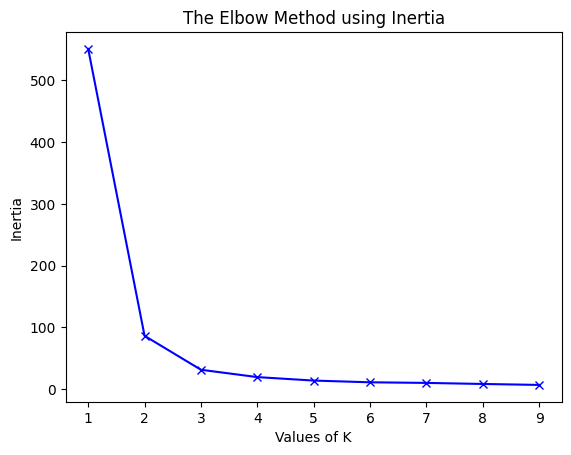

In [158]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia');

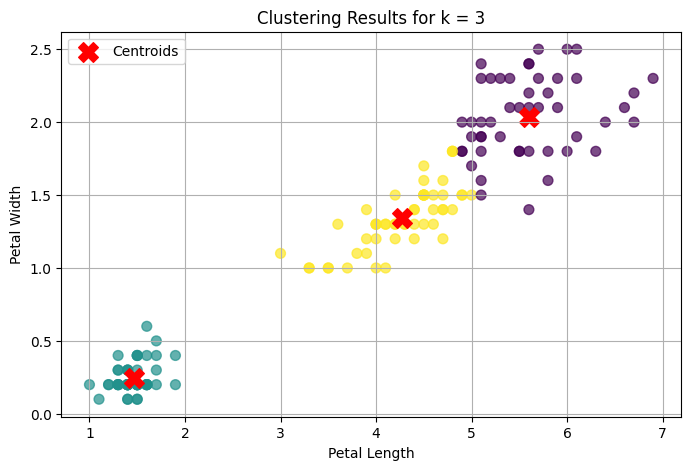

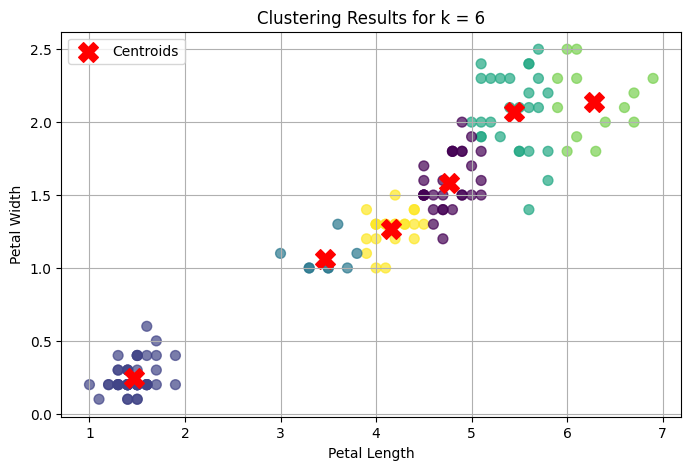

In [159]:
k_values_to_analyze = [3, 6]
results = {}

for k in k_values_to_analyze:
  kmeans = KMeans(n_clusters=k, random_state=42)
  clusters = kmeans.fit_predict(iris[['petal_length', 'petal_width']])
  results[k] = {
      "model": kmeans,
      "clusters": clusters
  }

for k, result in results.items():
  plt.figure(figsize=(8,5))
  plt.scatter(
      iris['petal_length'],
      iris['petal_width'],
      c=result['clusters'],
      cmap='viridis',
      s=50,
      alpha=0.7
  )
  plt.scatter(
      result['model'].cluster_centers_[:,0],
      result['model'].cluster_centers_[:, 1],
      c ='red',
      marker ='X',
      s = 200,
      label = 'Centroids'
  )
  plt.title(f'Clustering Results for k = {k}')
  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')
  plt.legend()
  plt.grid()
  plt.show()

In [160]:
X.loc[(X["petal_length"] < 3.2) & (X["petal_length"] > 2)]

,petal_length,petal_width
98,3.0,1.1


For n_clusters = 2 The average silhouette_score is : 0.7669465622770762


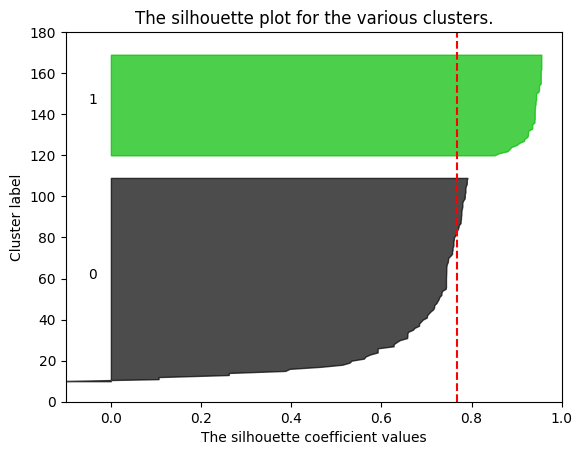

In [161]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

fig, ax1 = plt.subplots(1,1)

n_clusters = 2

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

cluster_labels = clustering.fit_predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
  ith_cluster_silhouette_values = \
    sample_silhouette_values[cluster_labels == i]

  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor=color, alpha=0.7)

  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--");

In [162]:
min(sample_silhouette_values)

-0.13132990547983361

For n_clusters = 3 The average silhouette_score is : 0.6573949269287823


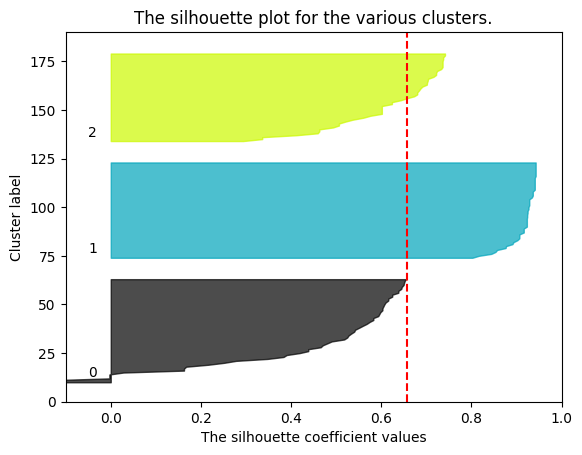

In [165]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(iris[["petal_length", "petal_width"]])

fig, ax1 = plt.subplots(1,1)

n_clusters = 3

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

cluster_labels = clustering.fit_predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
  ith_cluster_silhouette_values = \
    sample_silhouette_values[cluster_labels == i]

  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor=color, alpha=0.7)

  ax1.text(-0.05, y_lower + 0.05 * size_cluster_i, str(i))

  y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--");

In [166]:
min(sample_silhouette_values)

-0.14062817006789843

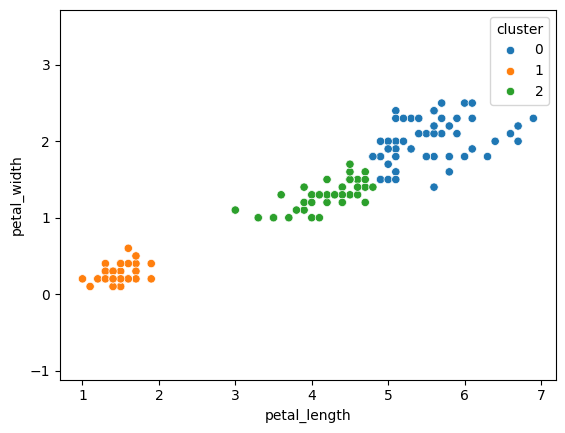

In [167]:
iris["cluster"] = cluster_labels
current_palette = sns.color_palette()[0:3]
sns.scatterplot(data = iris, x = "petal_length", y = "petal_width", hue = "cluster", palette= current_palette );
plt.axis('equal');